# Detecção de Fraude em Cartão de Crédito 
* Rafael Ribeiro 
* Arthur Ferreira 
* Gabriel Pasquotto 

## Banco de Dados

### Modelo Conceitual

In [ ]:
#No modelo conceitual, apresentamos as entendidades. Elas representam os principais elementos do sistema e suas interações.

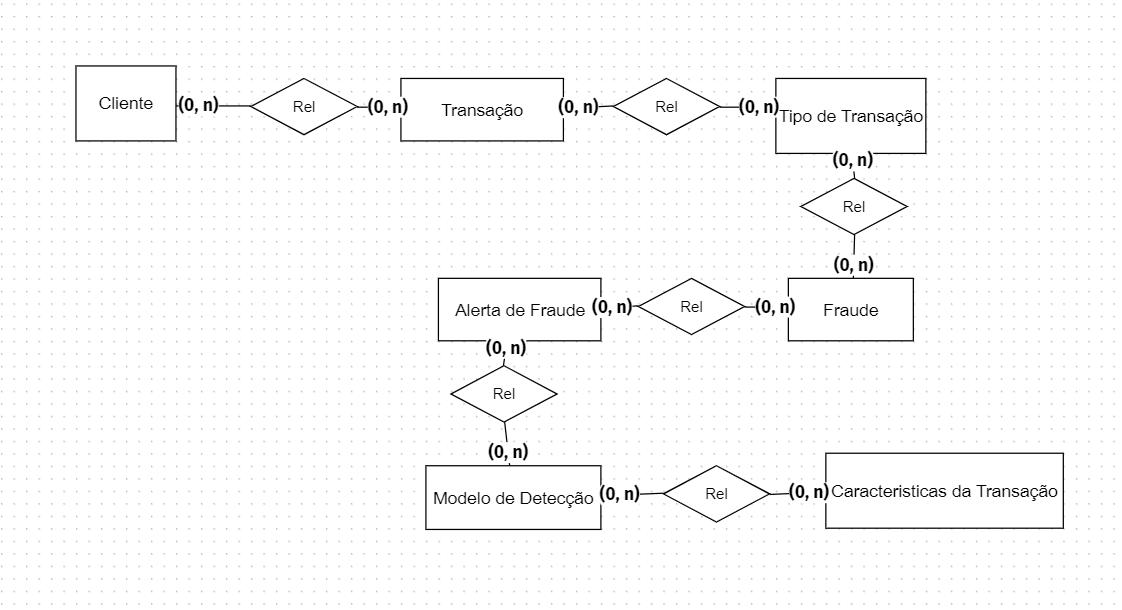

### Modelo Lógico

In [ ]:
#No modelo lógico, é uma representação mais detalhada do sistema, No nosso modelo, mapeamos as entidades conceituais para tabelas, definindo os atributos, tipos de dados e relacionamentos. Também estabelecemos as chaves primárias e as chaves estrangeiras para manter a integridade dos dados.

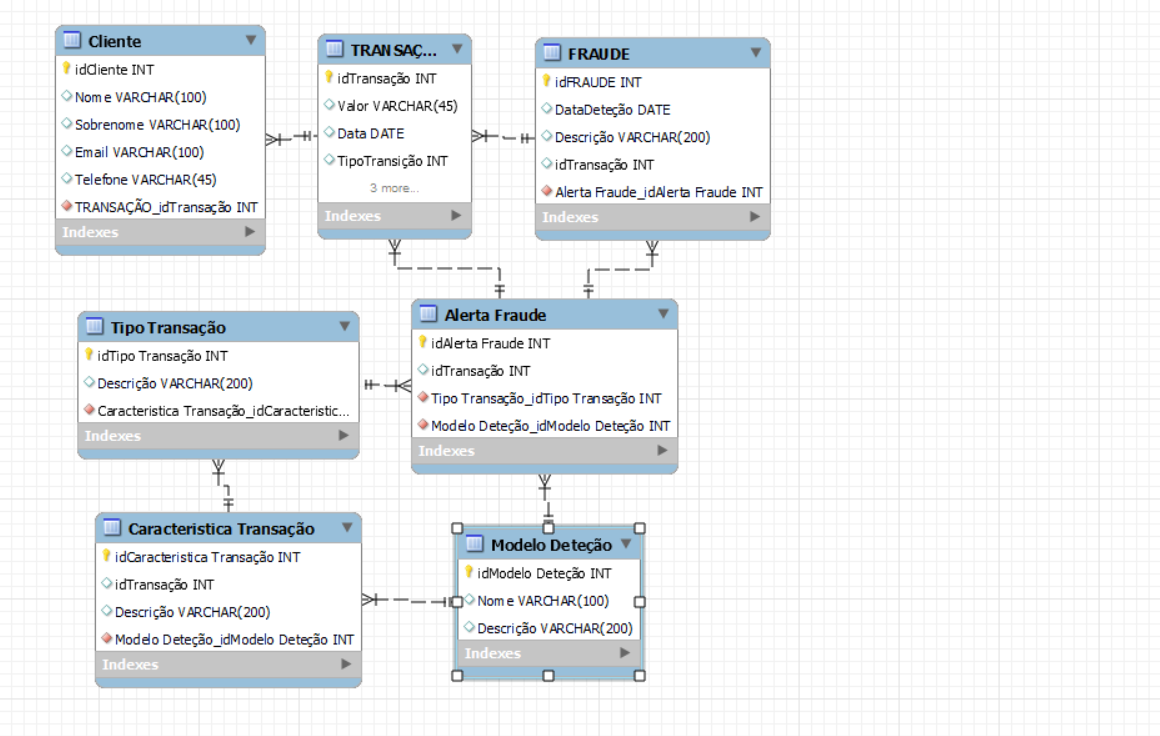

### Modelo Fisico

In [ ]:
#Adicionando tabelas
CREATE TABLE Cliente (
  IDCliente INT PRIMARY KEY,
  Nome VARCHAR(100),
  Email VARCHAR(100),
  Endereco VARCHAR(200),
  Telefone VARCHAR(20)
);

CREATE TABLE Transacao (
  IDTransacao INT PRIMARY KEY,
  IDCliente INT,
  Valor DECIMAL(10, 2),
  DataHora TIMESTAMP,
  FOREIGN KEY (IDCliente) REFERENCES Cliente(IDCliente)
);

CREATE TABLE ResultadoDetecao (
  IDResultado INT PRIMARY KEY,
  IDTransacao INT,
  IDModelo INT,
  Resultado VARCHAR(100),
  FOREIGN KEY (IDTransacao) REFERENCES Transacao(IDTransacao),
  FOREIGN KEY (IDModelo) REFERENCES ModeloDetecao(IDModelo)
);

CREATE TABLE CaracteristicaTransacao (
  IDCaracteristica INT PRIMARY KEY,
  IDTransacao INT,
  Caracteristica1 VARCHAR(100),
  Caracteristica2 VARCHAR(100),
  FOREIGN KEY (IDTransacao) REFERENCES Transacao(IDTransacao)
);

CREATE TABLE ModeloDetecao (
  IDModelo INT PRIMARY KEY,
  Nome VARCHAR(100),
  Descricao VARCHAR(200)
);

CREATE TABLE AlertaFraude (
  IDAlerta INT PRIMARY KEY,
  IDTransacao INT,
  Descricao VARCHAR(200),
  DataHora TIMESTAMP,
  FOREIGN KEY (IDTransacao) REFERENCES Transacao(IDTransacao)
);

In [ ]:
#Adicionando dados de clientes

INSERT INTO Cliente (IDCliente, Nome, Email, Endereco, Telefone) VALUES
(1, 'João Silva', 'joao.silva@gmail.com', 'Rua A, 123', '123456789');

INSERT INTO Cliente (IDCliente, Nome, Email, Endereco, Telefone) VALUES
(2, 'Maria Santos', 'maria.santos@gmail.com', 'Av. B, 456', '987654321');

INSERT INTO Cliente (IDCliente, Nome, Email, Endereco, Telefone) VALUES
(3, 'Pedro Oliveira', 'pedro.oliveira@gmail.com', 'Rua C, 789', '456123789');

INSERT INTO Cliente (IDCliente, Nome, Email, Endereco, Telefone) VALUES
(4, 'Ana Souza', 'ana.souza@example.com', 'Av. D, 987', '321987654');


In [ ]:
#Adicionando Transações Bancárias

INSERT INTO Transacao (IDTransacao, IDCliente, Valor, DataHora) VALUES
(1, 1, 100.50, TO_TIMESTAMP('2023-06-01 10:15:00', 'YYYY-MM-DD HH24:MI:SS'));

INSERT INTO Transacao (IDTransacao, IDCliente, Valor, DataHora) VALUES
(2, 2, 50.75, TO_TIMESTAMP('2023-06-02 14:30:00', 'YYYY-MM-DD HH24:MI:SS'));

INSERT INTO Transacao (IDTransacao, IDCliente, Valor, DataHora) VALUES
(3, 1, 200.00, TO_TIMESTAMP('2023-06-03 09:45:00', 'YYYY-MM-DD HH24:MI:SS'));

INSERT INTO Transacao (IDTransacao, IDCliente, Valor, DataHora) VALUES
(4, 4, 15500.00, TO_TIMESTAMP('2023-06-03 12:27:00', 'YYYY-MM-DD HH24:MI:SS'));

INSERT INTO Transacao (IDTransacao, IDCliente, Valor, DataHora) VALUES
(7, 2, 980.00, TO_TIMESTAMP('2022-06-08 15:30:00', 'YYYY-MM-DD HH24:MI:SS'));

INSERT INTO Transacao (IDTransacao, IDCliente, Valor, DataHora) VALUES
(10, 4, 843.00, TO_TIMESTAMP('2022-06-08 18:27:00', 'YYYY-MM-DD HH24:MI:SS'));

INSERT INTO Transacao (IDTransacao, IDCliente, Valor, DataHora) VALUES
(9, 3, 25843.00, TO_TIMESTAMP('2022-05-08 18:27:00', 'YYYY-MM-DD HH24:MI:SS'));

INSERT INTO Transacao (IDTransacao, IDCliente, Valor, DataHora) VALUES
(8, 3, 87843.00, TO_TIMESTAMP('2022-09-05 12:29:00', 'YYYY-MM-DD HH24:MI:SS'));

INSERT INTO Transacao (IDTransacao, IDCliente, Valor, DataHora) VALUES
(5, 1, 43.00, TO_TIMESTAMP('2022-09-05 15:49:00', 'YYYY-MM-DD HH24:MI:SS'));

INSERT INTO Transacao (IDTransacao, IDCliente, Valor, DataHora) VALUES
(6, 2, 43.00, TO_TIMESTAMP('2022-09-05 15:49:00', 'YYYY-MM-DD HH24:MI:SS'));

In [ ]:
#Adicionando as Características de Transação 

INSERT INTO CaracteristicaTransacao (IDCaracteristica, IDTransacao, Caracteristica1, Caracteristica2) VALUES
(1, 1, 'Aprovada', NULL);

INSERT INTO CaracteristicaTransacao (IDCaracteristica, IDTransacao, Caracteristica1, Caracteristica2) VALUES
(2, 2, 'Aprovada', NULL);

INSERT INTO CaracteristicaTransacao (IDCaracteristica, IDTransacao, Caracteristica1, Caracteristica2) VALUES
(3, 3, 'Aprovada', NULL);

INSERT INTO CaracteristicaTransacao (IDCaracteristica, IDTransacao, Caracteristica1, Caracteristica2) VALUES
(4, 4, 'Aprovada', NULL);

INSERT INTO CaracteristicaTransacao (IDCaracteristica, IDTransacao, Caracteristica1, Caracteristica2) VALUES
(5, 5, 'Aprovada', NULL);

INSERT INTO CaracteristicaTransacao (IDCaracteristica, IDTransacao, Caracteristica1, Caracteristica2) VALUES
(6, 6, 'Aprovada', NULL);

INSERT INTO CaracteristicaTransacao (IDCaracteristica, IDTransacao, Caracteristica1, Caracteristica2) VALUES
(7, 7, 'Aprovada', NULL);

INSERT INTO CaracteristicaTransacao (IDCaracteristica, IDTransacao, Caracteristica1, Caracteristica2) VALUES
(8, 8, 'Aprovada', NULL);

INSERT INTO CaracteristicaTransacao (IDCaracteristica, IDTransacao, Caracteristica1, Caracteristica2) VALUES
(9, 9, 'Aprovada', NULL);

INSERT INTO CaracteristicaTransacao (IDCaracteristica, IDTransacao, Caracteristica1, Caracteristica2) VALUES
(10, 10, 'Aprovada', NULL);

In [ ]:
#Adicionando os Modelos de Deteção 

INSERT INTO ModeloDetecao (IDModelo, Nome, Descricao) VALUES
(1, 'Sistema de Detecção de Fraude Bancária', 'Algoritmo de Detecção de Transações Suspeitas');

INSERT INTO ModeloDetecao (IDModelo, Nome, Descricao) VALUES
(2, 'Classificador de Risco de Crédito', 'Rede Neural para Identificação de Fraudes em Cartões de Crédito');

INSERT INTO ModeloDetecao (IDModelo, Nome, Descricao) VALUES
(3, 'Algoritmo de Prevenção de Lavagem de Dinheiro', 'Sistema de Alerta de Fraudes Bancárias');

INSERT INTO ModeloDetecao (IDModelo, Nome, Descricao) VALUES
(4, 'Classificador de Transações Financeiras Legítimas', 'Algoritmo de Análise de Padrões de Fraude em Carões de Crédito');

INSERT INTO ModeloDetecao (IDModelo, Nome, Descricao) VALUES
(5, 'Sistema de Avaliação de Risco em Investimentos', 'Algoritmo de Detecção de Fraudes em Transferências Bancárias');



In [ ]:
#Adicionando os Alertas de Fraude 

INSERT INTO AlertaFraude (IDAlerta, IDTransacao, Descricao, DataHora) VALUES
(1, 8, 'Alerta de fraude detectado na transação 8', TO_TIMESTAMP('2022-09-05 12:30:00', 'YYYY-MM-DD HH24:MI:SS'));

INSERT INTO AlertaFraude (IDAlerta, IDTransacao, Descricao, DataHora) VALUES
(2, 2, 'Alerta de fraude detectado na transação 2', TO_TIMESTAMP('2023-06-02 14:31:00', 'YYYY-MM-DD HH24:MI:SS'));

INSERT INTO AlertaFraude (IDAlerta, IDTransacao, Descricao, DataHora) VALUES
(3, 9, 'Alerta de fraude detectado na transação 9', TO_TIMESTAMP('2022-05-08 18:27:00', 'YYYY-MM-DD HH24:MI:SS'));

INSERT INTO AlertaFraude (IDAlerta, IDTransacao, Descricao, DataHora) VALUES
(4, 4, 'Alerta de fraude detectado na transação 4', TO_TIMESTAMP('2023-06-03 12:27:00', 'YYYY-MM-DD HH24:MI:SS'));

In [ ]:
#Adicionando os Resultados das Transações  

INSERT INTO ResultadoDetecao (IDResultado, IDTransacao, IDModelo, Resultado) VALUES
(1, 8, 1, 'Fraude');

INSERT INTO ResultadoDetecao (IDResultado, IDTransacao, IDModelo, Resultado) VALUES
(2, 2, 2, 'Fraude');

INSERT INTO ResultadoDetecao (IDResultado, IDTransacao, IDModelo, Resultado) VALUES
(3, 9, 5, 'Fraude');

INSERT INTO ResultadoDetecao (IDResultado, IDTransacao, IDModelo, Resultado) VALUES
(4, 4, 3, 'Fraude');

### Querrys

In [ ]:
#Questão 1
#Liste todas as transações realizadas pelo cliente 1 e 2.


In [ ]:
SELECT *
FROM Transacao
WHERE IDCliente = 1;

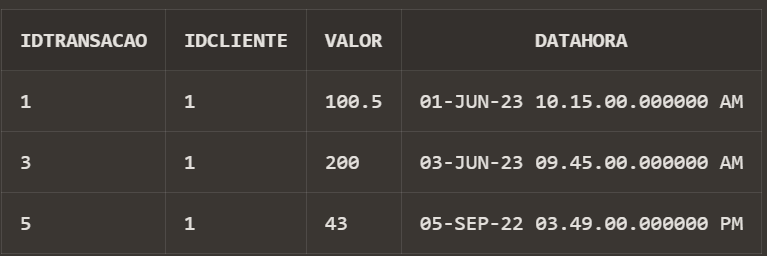

In [ ]:
SELECT *
FROM Transacao
WHERE IDCliente = 2;

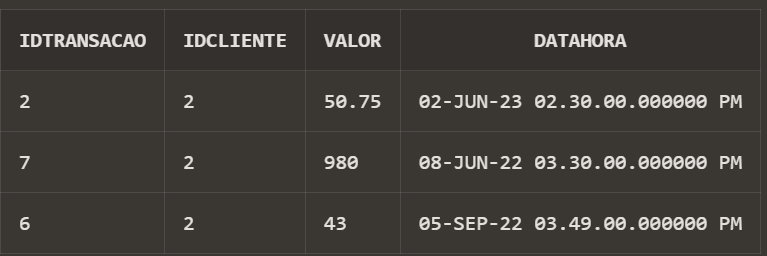

In [ ]:
#Questão 2
#Obtenha o valor total das transações realizadas em um determinado dia: 

In [ ]:
SELECT SUM(Valor) AS ValorTotal
FROM Transacao
WHERE Datahora = TO_DATE('2022-06-08 18:27:00', 'YYYY-MM-DD HH24:MI:SS');

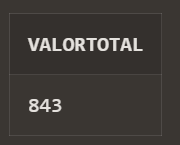

In [ ]:
SELECT SUM(Valor) AS ValorTotal
FROM Transacao
WHERE Datahora = TO_DATE('2023-06-01 10:15:00', 'YYYY-MM-DD HH24:MI:SS');

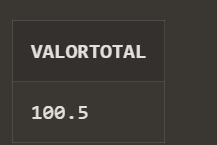

In [ ]:
SELECT SUM(Valor) AS ValorTotal
FROM Transacao
WHERE Datahora = TO_DATE('2023-06-02 14:30:00', 'YYYY-MM-DD HH24:MI:SS');

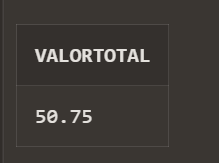

In [ ]:
#Questão 3
#Encontre as transações com valor acima de um determinado limite

In [ ]:
#Acima de R$1000

SELECT *
FROM Transacao
WHERE Valor > 1000;

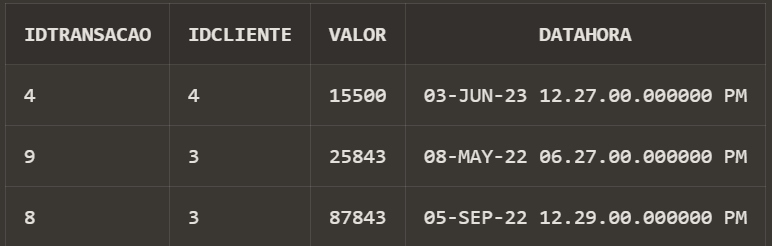

In [ ]:
#Acima de R$500

SELECT *
FROM Transacao
WHERE Valor > 500;

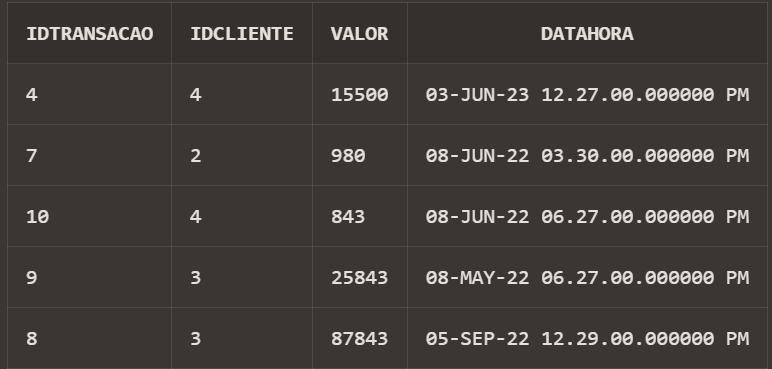

In [ ]:
#Acima de R$100
SELECT *
FROM Transacao
WHERE Valor > 100;

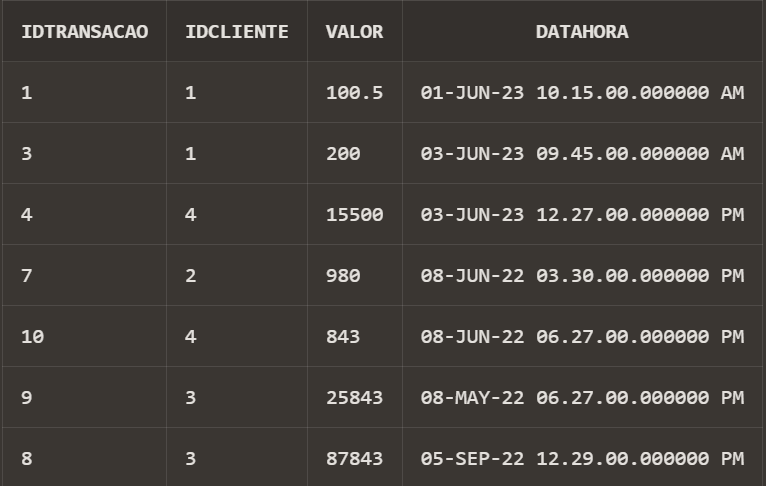

In [ ]:
#Questão 4
#Quantos Clientes o sistema tem registrado? 

In [ ]:
SELECT COUNT(*) AS TotalClientes
FROM Cliente;

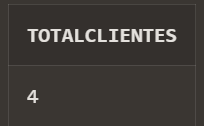

In [ ]:
#Questão 5
#Liste o Total de transações de cada cliente

In [ ]:
Total de transações por cliente

In [ ]:
SELECT C.Nome, COUNT(*) AS TotalTransacoes
FROM Cliente C
JOIN Transacao T ON C.IDCliente = T.IDCliente
GROUP BY C.Nome;

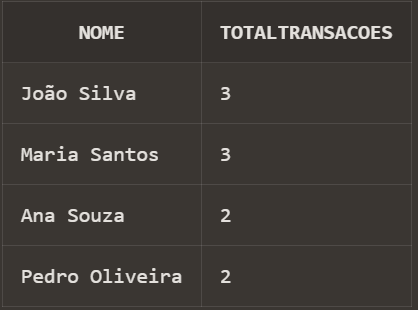

In [ ]:
#Questão 6
#Calcule a média de valores das transações por cliente

In [ ]:
SELECT C.Nome, AVG(T.Valor) AS MediaValorTransacoes
FROM Cliente C
JOIN Transacao T ON C.IDCliente = T.IDCliente
GROUP BY C.Nome;

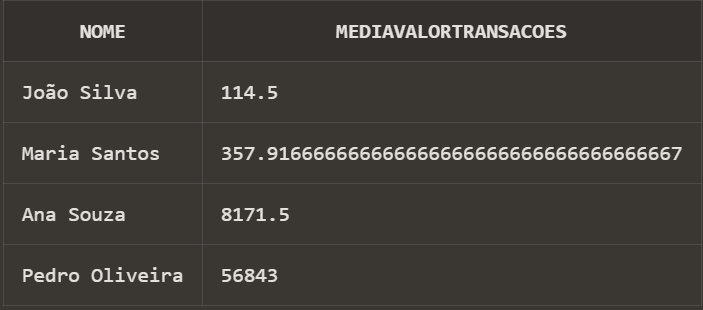

In [ ]:
#Questõ 7
#Liste o total de transações por hora

In [ ]:
SELECT TO_CHAR(T.Datahora, 'HH24') AS Hora, COUNT(*) AS TotalTransacoes
FROM Transacao T
GROUP BY TO_CHAR(T.Datahora, 'HH24');

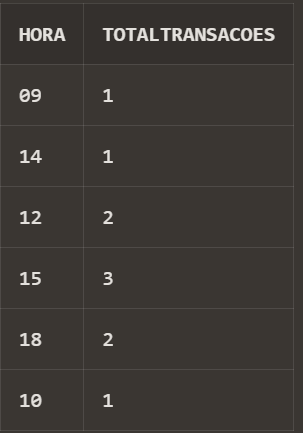

In [ ]:
#Questão 8
#Liste o total de transações por cliente

In [ ]:
SELECT C.Nome, SUM(T.Valor) AS ValorTotalTransacoes
FROM Cliente C
JOIN Transacao T ON C.IDCliente = T.IDCliente
GROUP BY C.Nome;

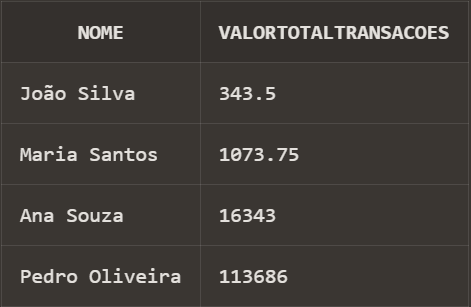

In [ ]:
#Questão 9
#Liste as transações com alerta de fraude

In [ ]:
SELECT a.IDAlerta, t.IDTransacao, t.Valor, a.Descricao
FROM AlertaFraude a
JOIN Transacao t ON a.IDTransacao = t.IDTransacao;


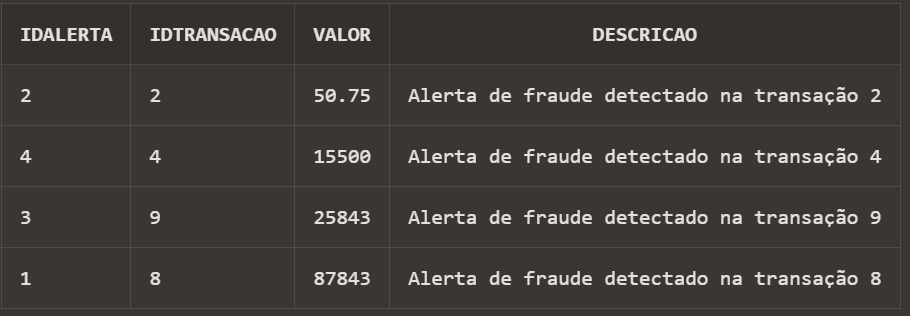

In [ ]:
#Questão 10
#Liste 5 Transações Aprovadas

In [ ]:
SELECT T.IDTransacao, T.Valor, CT.Caracteristica1, CT.Caracteristica2
FROM Transacao T
LEFT JOIN CaracteristicaTransacao CT ON T.IDTransacao = CT.IDTransacao
WHERE CT.Caracteristica1 IS NULL OR CT.Caracteristica2 IS NULL;

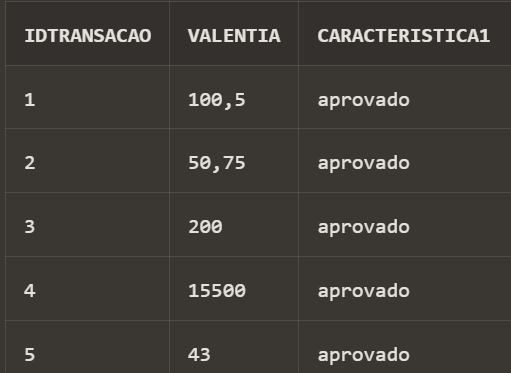

## Machine Learning

In [8]:
# Começando importando as bibliotecas necessárias para a realização do projeto
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import missingno
import numpy as np
import matplotlib.patches as mpatches


sns.set_style('whitegrid', {'axes.grid': False}) 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# Importar o arquivo
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# Importar o arquivo para um DataFrame
data = pd.read_csv(file_path)

### Dividindo o dataset em conjunto de treino e teste

In [39]:
print("Dimensão do dataset original: ", data.shape)

# Fazendo o split do dataset com 15% para teste
test = data.sample(frac=0.15, random_state=5)
data = data.drop(test.index)

print("Dimensão do dataset de Treino: ", data.shape)
print("Dimensão do dataset de Teste: ", test.shape)

Dimensão do dataset original:  (284807, 31)
Dimensão do dataset de Treino:  (242086, 31)
Dimensão do dataset de Teste:  (42721, 31)


### Realizando a Análise Exploratória 

* Amount - É o valor de cada operação do cartão de crédito

* Time - É a diferença de tempo de cada transação realizada

* Class - Indica se houve alguma fraude ou não, em formato binário. Significando que 0 não houve uma fraude, 1 houve uma fraude

* Essa base de dados traz uma série de transações de cartão de crédito em PCA ( Análise de Componentes Principais) que vão de V1 - V28


In [26]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174907 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    174907 non-null  float64
 1   V1      174907 non-null  float64
 2   V2      174907 non-null  float64
 3   V3      174907 non-null  float64
 4   V4      174907 non-null  float64
 5   V5      174907 non-null  float64
 6   V6      174907 non-null  float64
 7   V7      174907 non-null  float64
 8   V8      174907 non-null  float64
 9   V9      174907 non-null  float64
 10  V10     174907 non-null  float64
 11  V11     174907 non-null  float64
 12  V12     174907 non-null  float64
 13  V13     174907 non-null  float64
 14  V14     174907 non-null  float64
 15  V15     174907 non-null  float64
 16  V16     174907 non-null  float64
 17  V17     174907 non-null  float64
 18  V18     174907 non-null  float64
 19  V19     174907 non-null  float64
 20  V20     174907 non-null  float64
 21  V21     17

In [28]:
# Visualizando o resumo estatístico do dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,174907.000000,174907.000000,174907.000000,174907.000000,174907.000000,174907.000000,174907.000000,174907.000000,174907.000000,174907.000000,...,174907.000000,174907.000000,174907.000000,174907.000000,174907.000000,174907.000000,174907.000000,174907.000000,174907.000000,174907.000000
mean,94732.813215,0.000097,-0.001804,-0.000271,-0.000745,-0.003241,0.000628,0.001528,-0.002201,0.001494,...,0.000931,-0.000153,-0.000726,-0.000905,-0.000714,-0.000593,-0.000567,-0.000394,89.146629,0.001687
std,47489.001959,1.951641,1.649580,1.507915,1.413900,1.348697,1.318309,1.206566,1.194749,1.100201,...,0.739305,0.726195,0.634170,0.605315,0.521170,0.482586,0.400562,0.318386,251.954097,0.041034
min,0.000000,-46.855047,-63.344698,-31.813586,-5.683171,-40.427726,-21.248752,-43.557242,-73.216718,-13.320155,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54155.500000,-0.921102,-0.602757,-0.888753,-0.848914,-0.696381,-0.767537,-0.554906,-0.208837,-0.641983,...,-0.227902,-0.541096,-0.162927,-0.355472,-0.317671,-0.328078,-0.070935,-0.053091,5.500000,0.000000
50%,84631.000000,0.019596,0.063237,0.177015,-0.019077,-0.057242,-0.272212,0.040219,0.022178,-0.049813,...,-0.028899,0.006626,-0.011214,0.040477,0.014983,-0.052164,0.001036,0.011185,22.140000,0.000000
75%,139256.500000,1.315771,0.802940,1.026561,0.744631,0.609925,0.400426,0.571769,0.327044,0.600272,...,0.186233,0.529161,0.147168,0.438445,0.349798,0.241673,0.090223,0.078431,78.000000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,31.457046,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.016342,6.070850,3.220178,12.152401,16.129609,19656.530000,1.000000


In [29]:
#Verificando se possue valores ausentes
(data.isnull().sum() / data.shape[0]).sort_values(ascending=False)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

<AxesSubplot:>

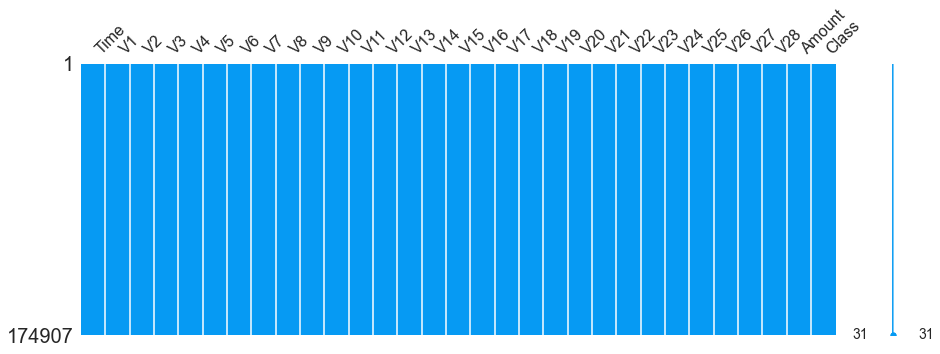

In [30]:
# Verificando de forma gráfica valores ausentes.


def rgbConverter(r, g, b):
  r_percentage = "{:.3f}".format(r/255)
  g_percentage = "{:.3f}".format(g/255)
  b_percentage = "{:.3f}".format(b/255)
  return (float(r_percentage), float(g_percentage), float(b_percentage))

missingno.matrix(data, figsize=(15,5), color=rgbConverter(6, 154, 243))

De forma gráfica, vemos que não possue valores ausentes.

## Verificando o balanceamento do dataset em dois gráficos abaixo

Transações sem fraudes: 99.83%
Transações com fraudes: 0.17%



C:\Users\Rafael 2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


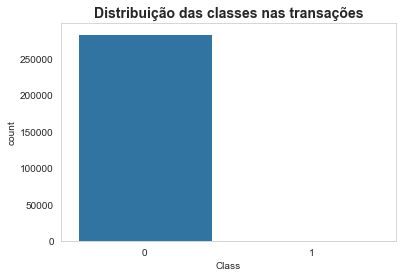

In [6]:
# imprimindo a quantidade de cada classe
print(f'Transações sem fraudes: {round(data.Class.value_counts(normalize=True)[0]*100, 2)}%')
print(f'Transações com fraudes: {round(data.Class.value_counts(normalize=True)[1]*100, 2)}%\n')

# definindo a área de plotagem
plt.figure(figsize=(6,4))

# plotando o gráfico
sns.countplot(data.Class)

# definindo título
plt.title('Distribuição das classes nas transações', fontweight='bold', fontsize=14)

# exibindo o gráfico
plt.show()

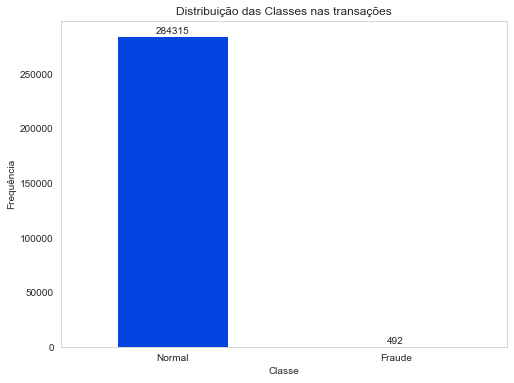

In [36]:
count_classes = pd.value_counts(data['Class'], sort=True)

# Definir as cores
colors = ['xkcd:blue', 'xkcd:red']

# Plotar o gráfico de barras das classes
plt.figure(figsize=(8, 6))
count_classes.plot(kind='bar', rot=0, color=colors)
plt.title("Distribuição das Classes nas transações")
plt.xticks(range(2), ['Normal', 'Fraude'])
plt.xlabel("Classe")
plt.ylabel("Frequência")

# Anotar as frequências acima de cada barra
for i, count in enumerate(count_classes):
    plt.text(i, count + 1000, count, ha='center', va='bottom')

plt.show()

Observando os dois gráficos acima, podemos notar que são gráficos que está totalmente desbalanceado, sendo que menos de 1% de transações são fradulente. Então é necessário fazer um balanceamento dos dados para a construção do nosso modelo

In [7]:
# Uma forma de calcular a % de fraudes
print("Fraudes representam {:.4f}% do total de entradas".format((data[data.Class == 1].shape[0] / data.shape[0])*100))

Fraudes representam 0.1727% do total de entradas


#### Criamos quatro gráficos para comparar o comportamento e a distribuição das classes:

* Dois gráficos (1 e 3) utilizam o tempo (Time) como referência, no entanto, não foi possível extrair informações significativas desses gráficos.

* Dois gráficos (2 e 4) utilizam o valor das transações (Amount) como referência. Nesses dois gráficos, foi observado que o valor das transações legítimas geralmente está na faixa de 0 a 5000. Por outro lado, as transações fraudulentas têm muito poucas ocorrências com valores acima de 500.

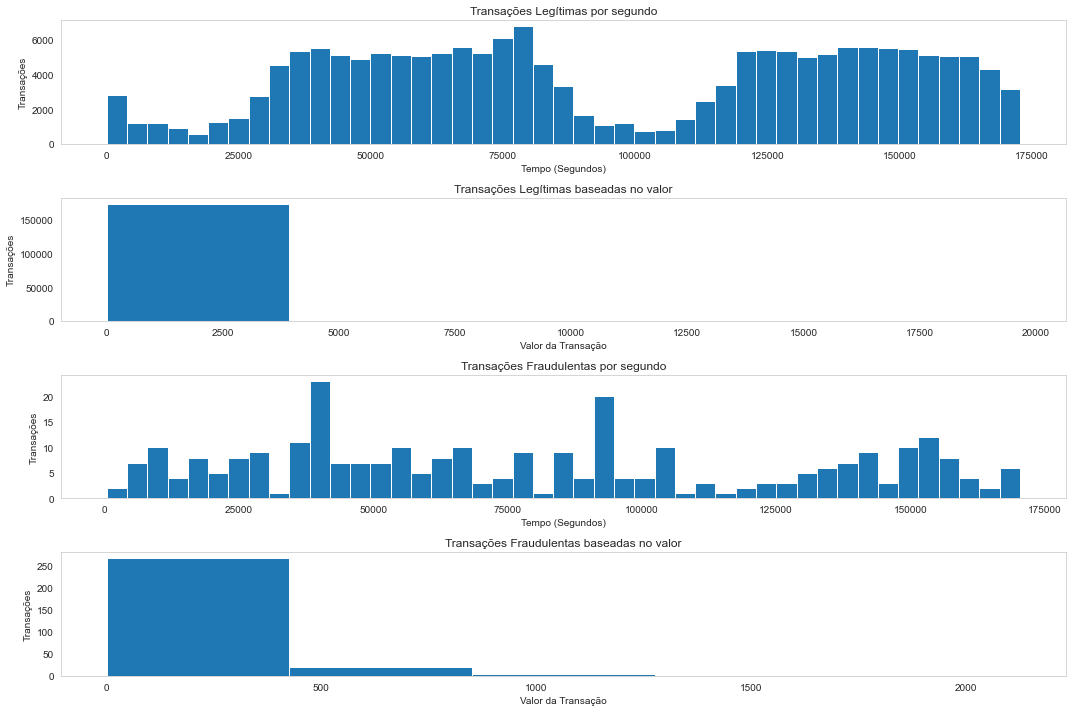

In [34]:
# Plotar gráfico 
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15,10))

# Definir número de barras dos gráficos
num_bins_time = 45
num_bins_amount = 5

# Gráfico 1
ax[0].hist(data.Time[data.Class == 0], bins=num_bins_time)
ax[0].set_title('Transações Legítimas por segundo')
ax[0].set_ylabel('Transações')
ax[0].set_xlabel('Tempo (Segundos)')

# Gráfico 2
ax[1].hist(data.Amount[data.Class == 0], bins=num_bins_amount)
ax[1].set_title('Transações Legítimas baseadas no valor')
ax[1].set_ylabel('Transações')
ax[1].set_xlabel('Valor da Transação')

# Gráfico 3
ax[2].hist(data.Time[data.Class == 1], bins=num_bins_time)
ax[2].set_title('Transações Fraudulentas por segundo')
ax[2].set_ylabel('Transações')
ax[2].set_xlabel('Tempo (Segundos)')

# Gráfico 4
ax[3].hist(data.Amount[data.Class == 1], bins=num_bins_amount)
ax[3].set_title('Transações Fraudulentas baseadas no valor')
ax[3].set_ylabel('Transações')
ax[3].set_xlabel('Valor da Transação')

# Mostrar gráficos
plt.tight_layout();

O gráfico de boxplots, é uma ferramenta para ver se tem diferença no padrão das transações em relação ao seu valor. E é possivel notar que tem uma distribuição diferente para as duas classes.

C:\Users\Rafael 2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


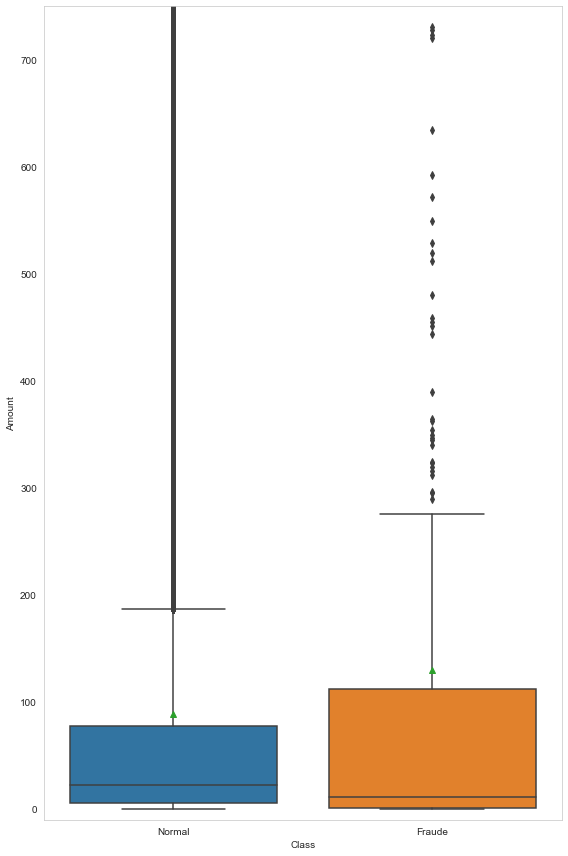

In [36]:

# Plotar Boxplot
fig , ax = plt.subplots(figsize=(8, 12), sharex=True)
sns.boxplot(data.Class, data.Amount, showmeans=True, ax=ax, orient='v')

# Definir limites
plt.ylim((-10, 750))
plt.xticks([0, 1],['Normal', 'Fraude'])

# Mostrar Boxplot
plt.tight_layout();
     


# Normalização dos dados

## Balanceamento dos dados

Precisamos fazer um balanceamento nos dados, para obtermos uma maior acurácia no treinamento do nosso modelo.


In [19]:
# Realizando uma cópia do dataframe
data_limpo = data.copy()


#Usando o StandardScaler da biblioteca sklearn.preprocessing para normalizar os dados
stdScaler = StandardScaler()

# Criando duas novas colunas no dataset, que conterá os dados normalizados
data_limpo['std_amount'] = stdScaler.fit_transform(data_limpo.Amount.values.reshape(-1, 1))
data_limpo['std_time'] = stdScaler.fit_transform(data_limpo.Time.values.reshape(-1, 1))

data_limpo.drop(['Time', 'Amount'], axis=1, inplace=True)

In [20]:
# Separar os dados 
X = data_limpo.drop('Class', axis=1)
y = data_limpo['Class']

# Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

In [21]:
data_limpo.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


C:\Users\Rafael 2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    369
1    369
Name: Class, dtype: int64


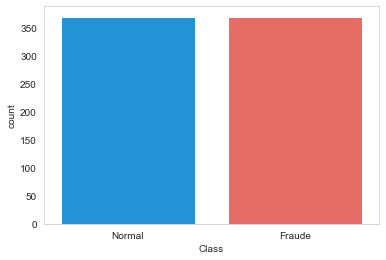

In [22]:
paleta = {classes: "xkcd:azure" if classes == 0 else "xkcd:coral" for classes in data.Class.unique()}

# Utilizando a técnica under-sampling para os dados de treino ( Técnica under-sampling utilizada para equilibrar )
rus = RandomUnderSampler()

# Os dados balanceados serão extraídos das variáveis X_train e y_train.
X_rus, y_rus = rus.fit_resample(X_train, y_train)

print(pd.Series(y_rus).value_counts())

plot = sns.countplot(y_rus, palette=paleta)
plot.set(xticklabels=['Normal', 'Fraude']);

* A técnica undersumpling serve para equilibrar a quantidade de transações normais com as transações fradulentas, ajudando o desempenho do modelo.

## Regressão Logística utilizando os dados balanceados

In [ ]:
from sklearn.model_selection import train_test_split

# X e y são os dados originais antes da normalização e manipulação dos dados
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# O restante do código, incluindo a instância do modelo e o treinamento, vem depois dessa linha

In [40]:
# Escolha e importação do modelo
from sklearn.linear_model import LogisticRegression
# Instanciando e escolhendo os hyperparameters.
model_bal = LogisticRegression()

# O modelo é treinado usando o método fit, passando a matriz de características e o vetor alvo balanceados (X_rus e y_rus).
model_bal.fit(X_rus, y_rus)

# Realizando previsões em cima de novos dados
y_pred_rus = model_bal.predict(X_val)
y_proba_rus = model_bal.predict_proba(X_val)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9702    0.9848     56864
           1     0.0510    0.9286    0.0967        98

    accuracy                         0.9701     56962
   macro avg     0.5254    0.9494    0.5407     56962
weighted avg     0.9982    0.9701    0.9833     56962

Acurácia: 0.9701

AUC: 0.9494



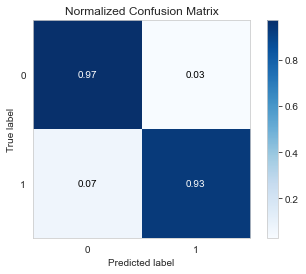

In [41]:
# Plotando matriz de confusão
fig = skplt.metrics.plot_confusion_matrix(y_val, y_pred_rus, normalize=True)

print("Relatório de Classificação:\n", classification_report(y_val, y_pred_rus, digits=4))

# Imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred_rus)))

# Imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred_rus)))

A partir do resultado do modelo de Regressão Logística, tivemos uma precisão de 93% na previsão de fraudes. A capacidade de detecção de fraudes é o quarto quadrante da nossa matriz de confusão.

## Modelo SVM

In [29]:
# 1. Escolha e importação do modelo
from sklearn import svm

# 2. Instanciando e escolhendo os hyperparameters.
model_bal_svm = svm.SVC()

# 4. Fit do modelo (treinamento)
model_bal_svm.fit(X_rus, y_rus)

# 5. Realizando previsões em cima de novos dados
y_pred_svm = model_bal_svm.predict(X_val)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9851    0.9924     56864
           1     0.0928    0.8878    0.1681        98

    accuracy                         0.9849     56962
   macro avg     0.5463    0.9364    0.5802     56962
weighted avg     0.9982    0.9849    0.9910     56962

Acurácia: 0.9849

AUC: 0.9364



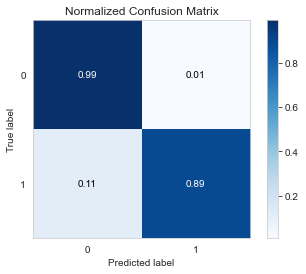

In [30]:
# Plotagem da matriz de confusão
fig = skplt.metrics.plot_confusion_matrix(y_val, y_pred_svm, normalize=True)

# Imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred_svm, digits=4))

# Imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred_svm)))

# Imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred_svm)))

In [42]:
# Calcular a acurácia global do SVC
accuracy = accuracy_score(y_val, y_pred_svm)
print("Acurácia Global: {:.4f}\n".format(accuracy))

Acurácia Global: 0.9849



* No geral, o modelo SVM apresenta um desempenho relativamente bom na detecção de transações fraudulentas, com uma alta acurácia. No entanto, é importante notar que a precisão na detecção de fraudes é baixa, o que significa que pode haver um número significativo de falsos positivos. 

* Comparando o modelo de Regressão Logística com o modelo SVM, o modelo de regressão logística apresenta um recall e uma precisão maiores para a classe 1 (fraudes), o que indica uma melhoria na detecção de transações fraudulentas.